# **Importing Libraries**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# **Loading Data**

In [ ]:
df = pd.read_csv("LoanDefault.csv")

# **Handling Missing Values**

In [ ]:
df = df.replace("?", np.nan)


# **Convert Categorical Variables to Numeric**

In [ ]:
df["REASON_CDE"] = df["REASON_CDE"].astype("category").cat.codes
df["JOB_CDE"] = df["JOB_CDE"].astype("category").cat.codes

# **Separate Features and Target**

In [ ]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]


# **Imputation of Missing Values**

In [ ]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


# **Split Data into Train and Test Sets**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Creating and Training a KNN Model**

In [ ]:

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# **Predictions**

In [ ]:

y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# **Evaluate the Model's Performance**

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# **ROC Curve**

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC: " + str(roc_auc_score(y_test, y_pred_proba)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()


# **Precision-Recall Curve**

In [ ]:


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# **Visualizing Correlation Matrix**

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Correlation Matrix")
plt.show()


# **Visualizing the Training Set Results**

Accuracy: 0.8791946308724832
AUC: 0.8846946958414481
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1189
           1       0.94      0.43      0.59       301

    accuracy                           0.88      1490
   macro avg       0.90      0.71      0.76      1490
weighted avg       0.89      0.88      0.86      1490

Confusion Matrix:
[[1180    9]
 [ 171  130]]


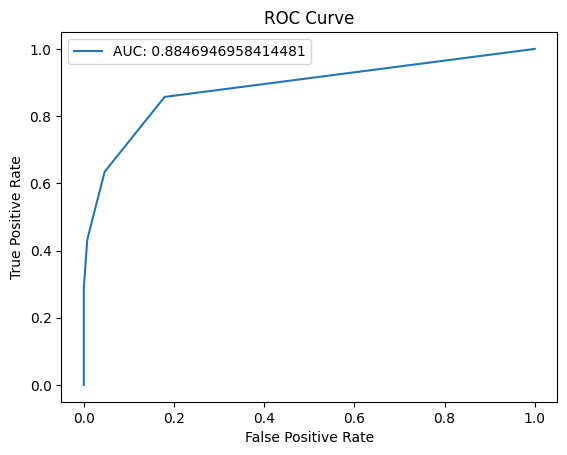

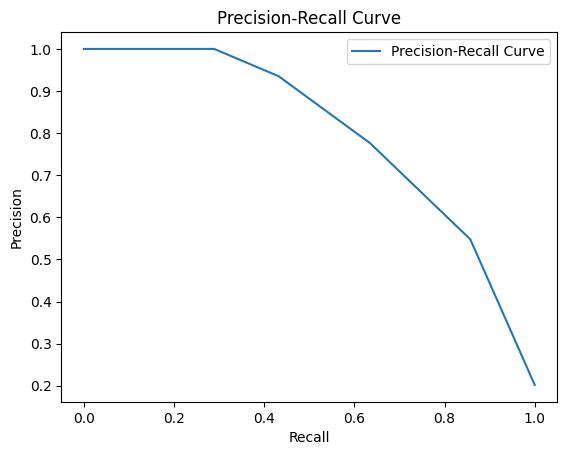

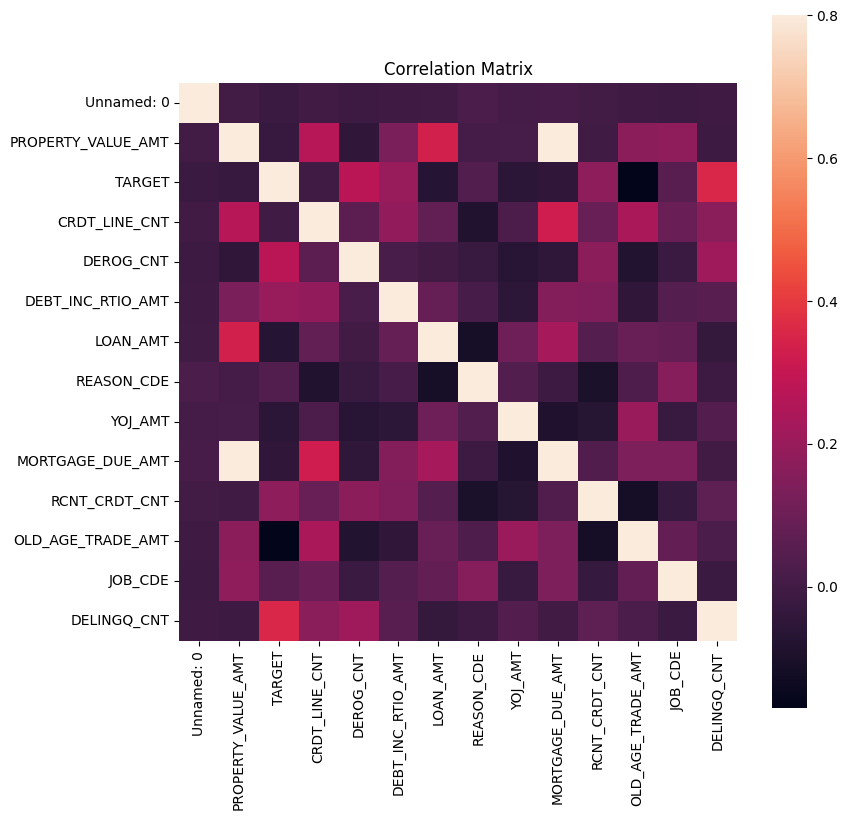

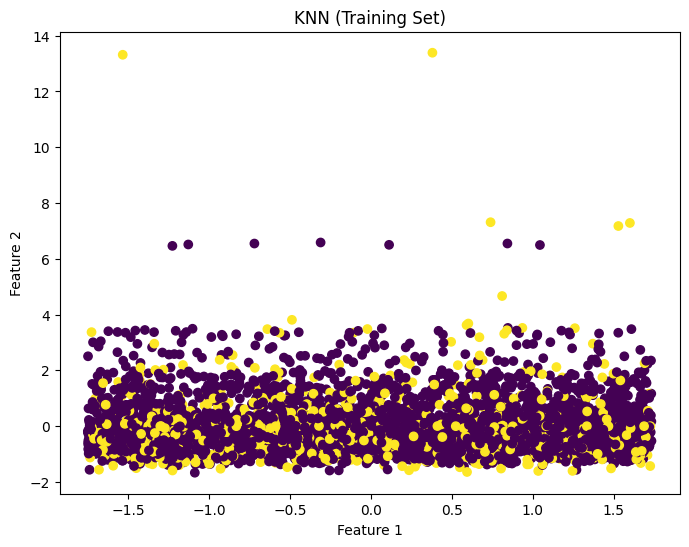

In [3]:

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN (Training Set)")
plt.show()

